# LIVE MNIST 

The LIVE MNIST project aims to create an interactive and dynamic visualization of the training, validation, and testing process for the well-known MNIST dataset. Users will be able to configure the number of layers and nodes in a Convolutional Neural Network (CNN) and observe a live representation of the model’s structure and learning progress directly on a web interface. Additionally, the project will feature an interactive drawing tool where users can sketch digits in real-time and instantly see the model’s predicted probabilities for each number, making the experience both educational and engaging.

1) MODEL rep

In [4]:
pip install matplotlib

  Using cached matplotlib-3.10.0-cp313-cp313-macosx_11_0_arm64.whl.metadata (11 kB)
  Using cached contourpy-1.3.1-cp313-cp313-macosx_11_0_arm64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.56.0-cp313-cp313-macosx_10_13_universal2.whl.metadata (101 kB)
  Using cached kiwisolver-1.4.8-cp313-cp313-macosx_11_0_arm64.whl.metadata (6.2 kB)
  Using cached pillow-11.1.0-cp313-cp313-macosx_11_0_arm64.whl.metadata (9.1 kB)
  Using cached pyparsing-3.2.1-py3-none-any.whl.metadata (5.0 kB)
Using cached matplotlib-3.10.0-cp313-cp313-macosx_11_0_arm64.whl (8.0 MB)
Using cached contourpy-1.3.1-cp313-cp313-macosx_11_0_arm64.whl (255 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.56.0-cp313-cp313-macosx_10_13_universal2.whl (2.7 MB)
Using cached kiwisolver-1.4.8-cp313-cp313-macosx_11_0_arm64.whl (65 kB)
Using cached pillow-11.1.0-cp313-cp313-macosx_11_0_arm64.whl (3.1 MB)
Using cached pyparsing-3.2.1

In [3]:
pip install pandas

  Using cached pandas-2.2.3-cp313-cp313-macosx_11_0_arm64.whl.metadata (89 kB)
  Using cached numpy-2.2.2-cp313-cp313-macosx_14_0_arm64.whl.metadata (62 kB)
  Using cached pytz-2025.1-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.1-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached pandas-2.2.3-cp313-cp313-macosx_11_0_arm64.whl (11.3 MB)
Using cached numpy-2.2.2-cp313-cp313-macosx_14_0_arm64.whl (5.1 MB)
Using cached pytz-2025.1-py2.py3-none-any.whl (507 kB)
Using cached tzdata-2025.1-py2.py3-none-any.whl (346 kB)
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


Basic libraries

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import time
import pandas as pd

This are the directions of our training and testing data

In [7]:
train_x = "dataset/train-images.idx3-ubyte"
train_y = "dataset/train-labels.idx1-ubyte"
test_x = "dataset/t10k-images.idx3-ubyte"
test_y = "dataset/t10k-labels.idx1-ubyte"

train_csv = "./csv_files/train.csv"
test_csv = "./csv_files/test.csv"

We will convert the ubyte into csv. 

In [8]:
def convert (imgs, labels, outline, n):
    imgf = open(imgs, 'rb') #this function opens the ubyte file.
    labelf = open(labels, 'rb')
    csvf = open(outline, 'w')

    imgf.read(16) #Jumping few bytes due to metadata
    labelf.read(8)
    images = []

    for i in range(n):
        image = [ord(labelf.read(1))] #The reason is 1 is because you want to read just 1 byte. When readed, it automatically jumps to next byte.
        for j in range(28*28):
            image.append(ord(imgf.read(1))) #When appending single num, we added to the list we are in.
        images.append(image)  #Finally adding the existing list to another one.
    
    for image in images:
        csvf.write(",".join(str(plx) for plx in image)+ "\n") #The conversion into csv file.

    imgf.close()
    labelf.close()
    csvf.close()

In [9]:
convert(train_x, train_y, train_csv, 60000) #generating the files
convert(test_x, test_y, test_csv, 10000)

In [10]:
train_file = open(train_csv, 'r')  
train_list = train_file.readlines()
train_file.close()
print(len(train_list))
num = 7

60000


In [11]:
train_list[num]

'3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,38,43,105,255,253,253,253,253,253,174,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,43,139,224,226,252,253,252,252,252,252,252,252,158,14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,178,252,252,252,252,253,252,252,252,252,252,252,252,59,0,0,0,0,0,0,0,0,0,0,0,0,0,0,109,252,252,230,132,133,132,132,189,252,252,252,252,59,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,29,29,24,0,0,0,0,14,226,252,252,172,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,85,243,252,252,144,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,88,189,252,252,252,14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,91,212,247,252,252,252,204,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,32,125,193,193,193,253,252,252,252,238,102,28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,45,222,252,252,252,252,253,252,25

In [12]:
class Representations:
    def rep_imag(list = train_list, num=0):
        values = list[num].split(",")
        images_array = np.asarray(values[1:], dtype=float).reshape((28,28))
        plt.imshow(images_array, cmap = "Grays", interpolation = "None")
        plt.grid(True, "major")

    def rep_matrix (list = train_list, num=0):
        values = list[num].split(",")
        images_array = np.asarray(values[1:], dtype=float).reshape((28,28))
        image_matrix = images_array.astype(int)
        print(pd.DataFrame(image_matrix).to_string(index=False, header=False))


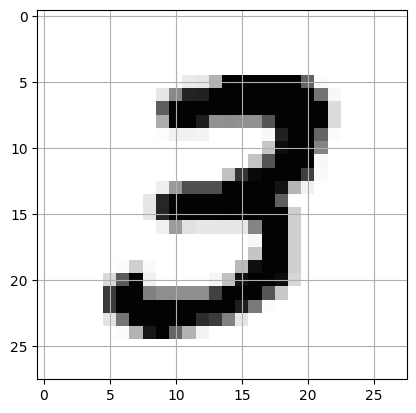

In [13]:
Representations.rep_imag(train_list, num)

In [14]:
Representations.rep_matrix(train_list, num)

0 0 0 0 0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  0 0 0 0 0 0
0 0 0 0 0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  0 0 0 0 0 0
0 0 0 0 0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  0 0 0 0 0 0
0 0 0 0 0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  0 0 0 0 0 0
0 0 0 0 0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  0 0 0 0 0 0
0 0 0 0 0   0   0   0   0   0   0  38  43 105 255 253 253 253 253 253 174   6  0 0 0 0 0 0
0 0 0 0 0   0   0   0   0  43 139 224 226 252 253 252 252 252 252 252 252 158 14 0 0 0 0 0
0 0 0 0 0   0   0   0   0 178 252 252 252 252 253 252 252 252 252 252 252 252 59 0 0 0 0 0
0 0 0 0 0   0   0   0   0 109 252 252 230 132 133 132 132 189 252 252 252 252 59 0 0 0 0 0
0 0 0 0 0   0   0   0   0   4  29  29  24   0   0   0   0  14 226 252 252 172  7 0 0 0 0 0
0 0 0 0 0   0   0   0   0   0   0   0   0   0   0   0   0  85 243 252 252 144  0 0 0 0 0 0

In [15]:
test_file = open(test_csv, 'r')
test_list = test_file.readlines()
test_file.close()
print(len(test_list))

10000


In [16]:
class CNN:
    def __init__(self, sizes, epochs, lr):
        self.sizes = sizes  # Tamaños de las capas
        self.epochs = epochs  # Número de épocas
        self.lr = lr  # Tasa de aprendizaje

        input_layer = sizes[0]
        hidden_1 = sizes[1]
        hidden_2 = sizes[2]
        output_layer = sizes[3]

        self.params = {
            'W1': np.random.randn(hidden_1, input_layer) * np.sqrt(1. / hidden_1),
            'W2': np.random.randn(hidden_2, hidden_1) * np.sqrt(1. / hidden_2),
            'W3': np.random.randn(output_layer, hidden_2) * np.sqrt(1. / output_layer)
        }

    def sigmoid(self, x, derivative=False):
        sig = 1 / (1 + np.exp(-x))
        if derivative:
            return sig * (1 - sig)
        return sig
    
    def softmax(self, x, derivative=False):
        exps = np.exp(x - np.max(x))  # Evitar overflow
        softmax_vals = exps / np.sum(exps, axis=0)
        if derivative:
            return softmax_vals * (1 - softmax_vals)
        return softmax_vals

    def forward_pass(self, x_train):
        params = self.params
        params['A0'] = x_train

        params['Z1'] = np.dot(params['W1'], params['A0'])
        params['A1'] = self.sigmoid(params['Z1'])

        params['Z2'] = np.dot(params['W2'], params['A1'])
        params['A2'] = self.sigmoid(params['Z2'])

        params['Z3'] = np.dot(params['W3'], params['A2'])
        params['A3'] = self.softmax(params['Z3'])

        return params['A3']
    
    def backward_pass(self, y_train, output):
        params = self.params
        change_w = {}

        error = 2 * (output - y_train) / output.shape[0] * self.softmax(params['Z3'], derivative=True)
        change_w['W3'] = np.outer(error, params['A2'])

        error = np.dot(params['W3'].T, error) * self.sigmoid(params['Z2'], derivative=True)
        change_w['W2'] = np.outer(error, params['A1'])

        error = np.dot(params['W2'].T, error) * self.sigmoid(params['Z1'], derivative=True)
        change_w['W1'] = np.outer(error, params['A0'])

        return change_w
    
    def update_weights(self, change_w):
        for key, val in change_w.items():
            if self.params[key].shape == val.shape:
                self.params[key] -= self.lr * val

    def compute_accuracy(self, test_list):
        predictions = []
        for x in test_list:
            values = x.split(',')
            inputs = (np.asarray(values[1:], dtype=np.float32) / 255.0 * 0.99) + 0.01
            targets = np.zeros(10) + 0.01
            targets[int(values[0])] = 0.99
            output = self.forward_pass(inputs)
            pred = np.argmax(output)
            predictions.append(pred == np.argmax(targets))

        return np.mean(predictions)

    def train(self, train_list, test_list):
        start_time = time.time()

        for iter in range(self.epochs):
            for x in train_list:
                values = x.split(',')
                inputs = (np.asarray(values[1:], dtype=np.float32) / 255.0 * 0.99) + 0.01
                targets = np.zeros(10) + 0.01
                targets[int(values[0])] = 0.99
                output = self.forward_pass(inputs)
                change_w = self.backward_pass(targets, output)
                self.update_weights(change_w)

            accuracy = self.compute_accuracy(test_list)
            print(f'Epoch: {iter+1}, Time Spent: {time.time()-start_time:.02f}s, Accuracy: {accuracy*100:.2f}%')


In [ ]:
dnn = CNN(sizes = [784, 128, 64, 10], epochs = 10, lr = 0.03)
dnn.train(train_list, test_list)

Epoch: 1, Time Spent: 10.84s, Accuracy: 59.50%


We have achived an accuraccy of 92.41% which is quite fine but, we could improve this by inserting a decaying learning rate. At the star, this will make big changes on the weights and each epoch will have a decrese on the learning rate.

In [219]:
class CNN_decay:
    def __init__(self, sizes, epochs, lr, decay=0.0):
        self.sizes = sizes 
        self.epochs = epochs  
        self.lr = lr 
        self.decay = decay 

        input_layer = sizes[0]
        hidden_1 = sizes[1]
        hidden_2 = sizes[2]
        output_layer = sizes[3]

        self.params = {
            'W1': np.random.randn(hidden_1, input_layer) * np.sqrt(1. / hidden_1),
            'W2': np.random.randn(hidden_2, hidden_1) * np.sqrt(1. / hidden_2),
            'W3': np.random.randn(output_layer, hidden_2) * np.sqrt(1. / output_layer)
        }

    def sigmoid(self, x, derivative=False):
        sig = 1 / (1 + np.exp(-x))
        if derivative:
            return sig * (1 - sig)
        return sig
    
    def softmax(self, x, derivative=False):
        exps = np.exp(x - np.max(x))  
        softmax_vals = exps / np.sum(exps, axis=0)
        if derivative:
            return softmax_vals * (1 - softmax_vals)
        return softmax_vals

    def forward_pass(self, x_train):
        params = self.params
        params['A0'] = x_train

        params['Z1'] = np.dot(params['W1'], params['A0'])
        params['A1'] = self.sigmoid(params['Z1'])

        params['Z2'] = np.dot(params['W2'], params['A1'])
        params['A2'] = self.sigmoid(params['Z2'])

        params['Z3'] = np.dot(params['W3'], params['A2'])
        params['A3'] = self.softmax(params['Z3'])

        return params['A3']
    
    def backward_pass(self, y_train, output):
        params = self.params
        change_w = {}

        error = 2 * (output - y_train) / output.shape[0] * self.softmax(params['Z3'], derivative=True)
        change_w['W3'] = np.outer(error, params['A2'])

        error = np.dot(params['W3'].T, error) * self.sigmoid(params['Z2'], derivative=True)
        change_w['W2'] = np.outer(error, params['A1'])

        error = np.dot(params['W2'].T, error) * self.sigmoid(params['Z1'], derivative=True)
        change_w['W1'] = np.outer(error, params['A0'])

        return change_w
    
    def update_weights(self, change_w):
        for key, val in change_w.items():
            if self.params[key].shape == val.shape:
                self.params[key] -= self.lr * val

    def compute_accuracy(self, list=train_list):
        predictions = []
        for x in list:
            values = x.split(',')
            inputs = (np.asarray(values[1:], dtype=np.float32) / 255.0 * 0.99) + 0.01
            targets = np.zeros(10) + 0.01
            targets[int(values[0])] = 0.99
            output = self.forward_pass(inputs)
            pred = np.argmax(output)
            predictions.append(pred == np.argmax(targets))

        return np.mean(predictions)

    def train(self, train_list, test_list):
        start_time = time.time()

        for iter in range(self.epochs):
            for x in train_list:
                values = x.split(',')
                inputs = (np.asarray(values[1:], dtype=np.float32) / 255.0 * 0.99) + 0.01
                targets = np.zeros(10) + 0.01
                targets[int(values[0])] = 0.99
                output = self.forward_pass(inputs)
                change_w = self.backward_pass(targets, output)
                self.update_weights(change_w)
            
            self.lr *= (1. / (1. + self.decay * iter))
            
            accuracy = self.compute_accuracy(test_list)
            print(f'Epoch: {iter+1}, Time Spent: {time.time()-start_time:.02f}s, Accuracy: {accuracy*100:.2f}%, Learning Rate: {self.lr:.6f}')


In [ ]:
dnn2 = CNN_decay(sizes = [784, 128, 64, 10], epochs = 10, lr = 0.9, decay = 0.06)
dnn2.train(train_list, test_list)

In [ ]:
dnn3 = CNN_decay(sizes = [784, 128, 64, 10], epochs = 10, lr = 2, decay = 0.1)
dnn3.train(train_list, test_list)

In [304]:
def forwarding_output(input_data=None, num=None, list = train_list ,neural=dnn3):
    
    actual_num = None 
    if num is not None:
        values = list[num].split(',')  
        inputs = (np.asarray(values[1:], dtype=np.float32) / 255.0 * 0.99) + 0.01 
        actual_num = int(float(values[0]))  
    elif input_data is not None:
        inputs = (np.asarray(input_data, dtype=np.float32) / 255.0 * 0.99) + 0.01  
    else:
        return None, None
    result = neural.forward_pass(inputs)
    np.set_printoptions(suppress=True, precision=4)

    predicted_label = int(np.argmax(result)) 
    return actual_num, predicted_label 


In [ ]:
num = 9944
lista = test_list
print(forwarding_output(lista, num))
Representations.rep_imag(lista, num)

In [ ]:
print(dnn3.compute_accuracy(train_list))
print(dnn3.compute_accuracy(test_list))

In [ ]:
res_vs_pred = []
lista=test_list
j=0

for i in lista:
    actual, predicted = forwarding_output(None, j, lista)
    if actual is not predicted:
        print(actual - predicted)
        res_vs_pred.append(j)
    j+=1

In [ ]:
res_vs_pred